In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


In [3]:
df_connections = pd.read_csv ('Connections.csv')
df_invitations = pd.read_csv ('Invitations.csv')

In [4]:
df_connections.head(10)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Pedram,Pasdar,NaN,DATAM Vira Engineering Industry,Founder & CEO,29 Apr 2020
1,Amin,Asadolah,NaN,Briefagency,Account Manager,29 Apr 2020
2,sadaf,ahadi,NaN,University of Tehran,Auditor,28 Apr 2020
3,ashkan,Taghipour,NaN,EnergyKade,Product Innovation Manager,28 Apr 2020
4,Alireza,Hadipour,NaN,Karaneh Danesh,Senior Expert of Management Consultancy,28 Apr 2020
5,mohamad amin,sharifpour,NaN,NaN,NaN,28 Apr 2020
6,Bahman,Shiri,NaN,NaN,NaN,28 Apr 2020
7,Dr Kamran,Yeganegi ( PH.D.),yeganegi.k@gmail.com,Islamic Azad University,Faculty Member,28 Apr 2020
8,mehdi,rahmanzadeh,NaN,Novin Hi-Tech Solutions,SQL Server Developer,28 Apr 2020
9,Alireza,Shafiee,NaN,Glorit | گلوریت,Chief Executive Officer,27 Apr 2020


In [5]:
df_connections['Position'].value_counts().head(20)

Digital Marketing Specialist             56
CEO                                      54
Digital Marketing Manager                46
Founder                                  35
Marketing Manager                        33
Manager                                  31
Co-Founder                               31
Data Scientist                           30
Research Assistant                       27
Managing Director                        19
Researcher                               17
Chief Executive Officer                  17
Product Manager                          15
Project Manager                          14
Sales Manager                            14
Teaching Assistant                       10
Business Development Manager             10
Student                                  10
Search Engine Optimization Specialist     9
Web Developer                             9
Name: Position, dtype: int64

In [6]:
df_invitations.head(10)

,From,To,Sent At,Message,Direction
0,Moein Nikpour,Alireza Shafiee,"4/27/20, 6:21 AM",NaN,OUTGOING
1,Moein Nikpour,Hamidreza Lachin,"4/22/20, 3:56 AM",NaN,OUTGOING
2,Moein Nikpour,hamid mohammadi,"4/19/20, 11:17 PM",NaN,OUTGOING
3,Moein Nikpour,mahdi khatmi nemati,"4/19/20, 11:16 PM",NaN,OUTGOING
4,Moein Nikpour,Forood Azargoshasbi,"4/19/20, 11:15 PM",NaN,OUTGOING
5,Moein Nikpour,Mohammad Rezazadeh,"4/19/20, 11:15 PM",NaN,OUTGOING
6,Moein Nikpour,Amir Aliyari,"4/19/20, 11:15 PM",NaN,OUTGOING
7,Moein Nikpour,Nojaan Mehr,"4/19/20, 11:14 PM",NaN,OUTGOING
8,Moein Nikpour,Hesam Zahedi,"4/19/20, 11:14 PM",NaN,OUTGOING
9,Moein Nikpour,saeid majlesi,"4/19/20, 11:13 PM",NaN,OUTGOING


# Creating a word cloud for connections position

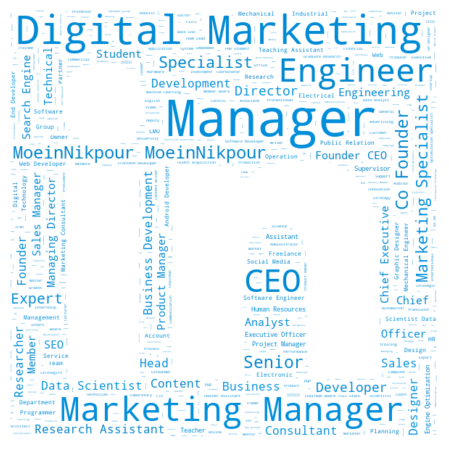

In [7]:
positions = df_connections.dropna(axis = 0,subset = ['Position'])['Position'].values
positions_string = ''
for pos in positions:
    pos = str (pos)
    pos = pos.replace (' ','-')
    positions_string = positions_string + ' '+pos+ ' '
    #print (type (pos))

positions_string = positions_string+ 90*' MoeinNikpour '


stopwords = set(STOPWORDS)
linkedin_mask = np.array(Image.open('LinkedIn_logo_initials.png'))


positions_wc = WordCloud(
    background_color='white',
    max_words=5000,
    max_font_size = 70,
    min_font_size = 2,
    stopwords=stopwords,
    margin=10,
    random_state=1,
    mask = linkedin_mask
)

# generate the word cloud
positions_wc.generate(positions_string)

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(201,99%%, %d%%)" % np.random.randint(40,45))

positions_wc.recolor(color_func = grey_color_func)


fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(8) # set height

# display the cloud
plt.imshow(positions_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
positions_wc.to_file('linekdin_connections_position.png')


# Plotting Connections positions Barchart

In [91]:
df_positions = pd.DataFrame (df_connections['Position'].value_counts().head(20))
df_positions.reset_index (inplace = True)
df_positions.rename (columns = {'Position':'Count','index':'Position'},inplace = True)
#df_positions ['Count'] = df_positions ['Count']/df_connections.shape[0]*100
df_positions ['Count']= df_positions ['Count']*4
df_positions.head()


,Position,Count
0,Digital Marketing Specialist,224
1,CEO,216
2,Digital Marketing Manager,184
3,Founder,140
4,Marketing Manager,132


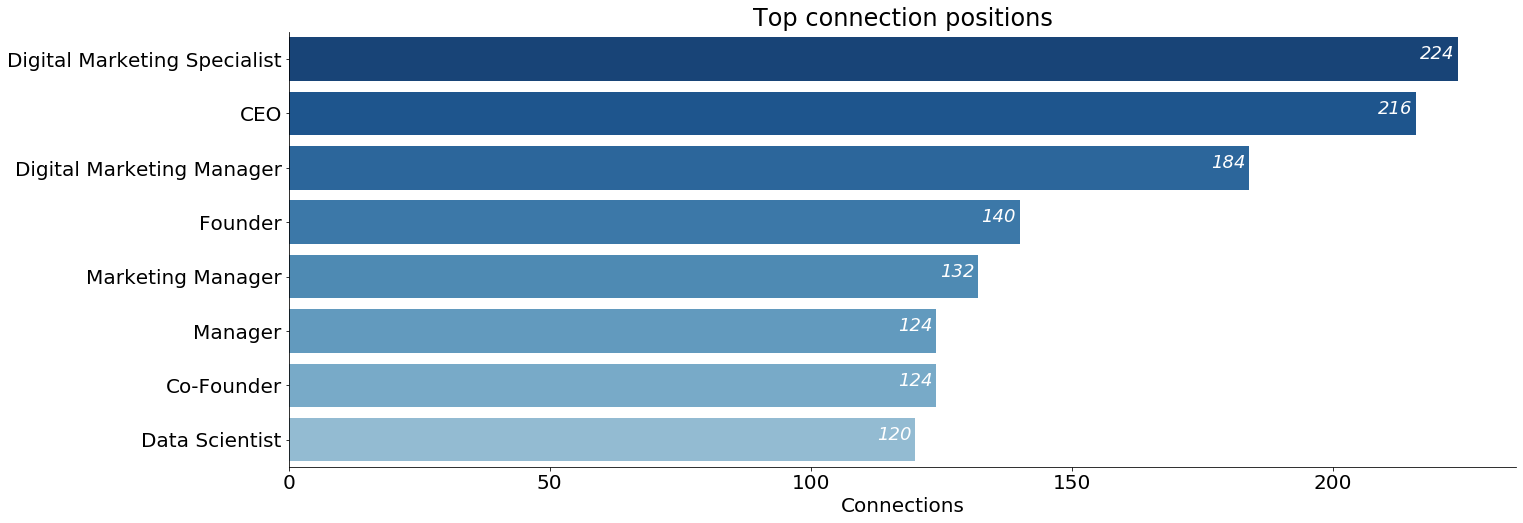

In [119]:
plt.figure (figsize = (22,8))
palette =reversed(  sns.color_palette("Blues",n_colors=13))
ax = sns.barplot (y='Position',x = 'Count',data = df_positions.head (8), palette=palette,orient='h')

for i, index in enumerate (df_positions.head (8).index):
        label = df_positions.loc[index,'Count']
        ax.text(label-4,i, round(label, 2), color='white', ha="center",style = 'oblique',fontsize=18)
       

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)

ax.xaxis.set_visible(True)
ax.set_ylabel(None)
ax.tick_params(labelsize=20)
ax.set_xlabel('Connections',fontsize=20)

plt.title ('Top connection positions',fontsize = 24)
plt.show()


# Plotting Connections position by time

In [37]:
df_pos_time = df_connections [['Position','Connected On']]
df_pos_time.head ()
df_pos_time['Connected On']= pd.to_datetime(df_pos_time['Connected On']) 

df_pos_time.dropna(axis =0,inplace = True)

df_pos_time = pd.merge(left=df_pos_time, right=df_positions.head(8), left_on='Position', right_on='Position')
df_pos_time.sort_values (by = ['Connected On'],inplace = True,ascending = True)
df_pos_time.reset_index (inplace = True,drop = True)
df_pos_time.head()

/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Position,Connected On,Count
0,CEO,2016-10-07,54
1,CEO,2016-10-17,54
2,Marketing Manager,2017-02-11,33
3,CEO,2017-04-25,54
4,Marketing Manager,2017-06-22,33


In [38]:
position_list = list (set (df_pos_time['Position'].values))
position_list_count = dict.fromkeys(position_list, 0)

for i in df_pos_time.index:
    p = df_pos_time.loc[i,'Position']
    position_list_count [p]= 1 + position_list_count [p]
    df_pos_time.loc [i,'Count_time'] = position_list_count[p]
df_pos_time['Count_time'] = df_pos_time ['Count_time']*2
df_pos_time.head()   

,Position,Connected On,Count,Count_time
0,CEO,2016-10-07,54,2.0
1,CEO,2016-10-17,54,4.0
2,Marketing Manager,2017-02-11,33,2.0
3,CEO,2017-04-25,54,6.0
4,Marketing Manager,2017-06-22,33,4.0


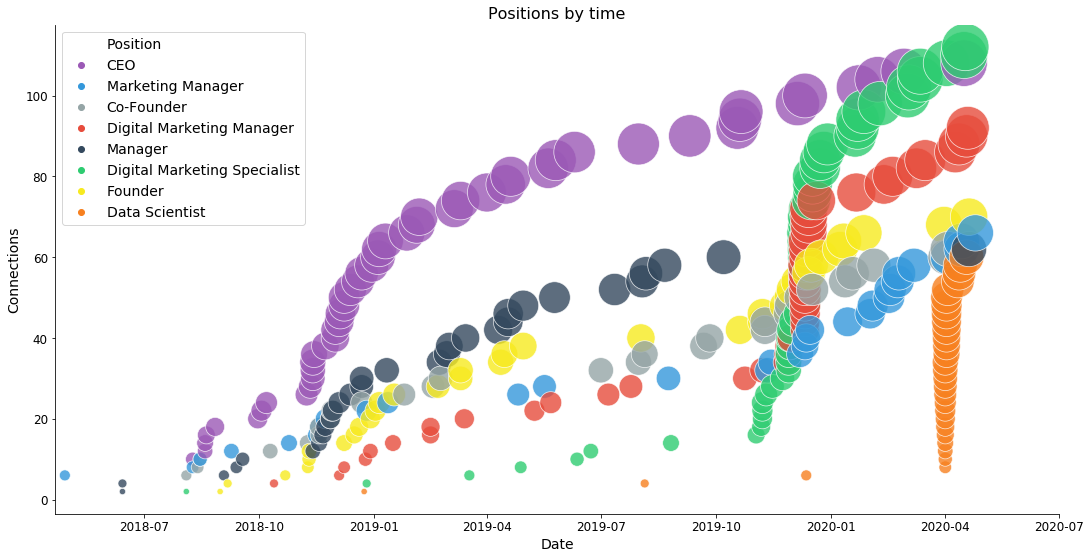

In [41]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f7ea1f","#f7801f"]
palette = sns.color_palette(flatui)
import datetime
plt.figure (figsize = (18,9))
ax = sns.scatterplot (data = df_pos_time,x='Connected On',y='Count_time',hue = 'Position',s=20*df_pos_time['Count_time'],alpha=0.8,palette=palette)

ax.set_xlim([datetime.date(2018, 4, 21), datetime.date(2020, 7, 1)])
plt.legend (fontsize = 14)

plt.title ('Positions by time',fontsize =16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel ('Connections',fontsize=14)
ax.set_xlabel('Date',fontsize=14)
ax.tick_params(labelsize=12)


## lineplot of Linkedin Connections

In [120]:
df_pos_time.head(20)

,Position,Connected On,Count,Count_time
0,CEO,2016-10-07,54,2.0
1,CEO,2016-10-17,54,4.0
2,Marketing Manager,2017-02-11,33,2.0
3,CEO,2017-04-25,54,6.0
4,Marketing Manager,2017-06-22,33,4.0
5,Co-Founder,2017-07-03,31,2.0
6,Digital Marketing Manager,2017-11-08,46,2.0
7,Co-Founder,2018-01-25,31,4.0
8,CEO,2018-03-21,54,8.0
9,Marketing Manager,2018-04-29,33,6.0


In [121]:
df_pos_time_line = df_connections [['Connected On']]
df_pos_time_line['Connected On']= pd.to_datetime(df_pos_time_line['Connected On']) 
df_pos_time_line.dropna(axis =0,inplace = True)
df_pos_time_line.sort_values (by = ['Connected On'],inplace = True,ascending = True)
df_pos_time_line.reset_index (inplace = True,drop = True)
df_pos_time_line.head(5)

/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

,Connected On
0,2014-02-26
1,2014-02-26
2,2014-02-26
3,2014-02-27
4,2014-02-27


In [122]:
index = df_pos_time_line.index.values
index

array([   0,    1,    2, ..., 2228, 2229, 2230])

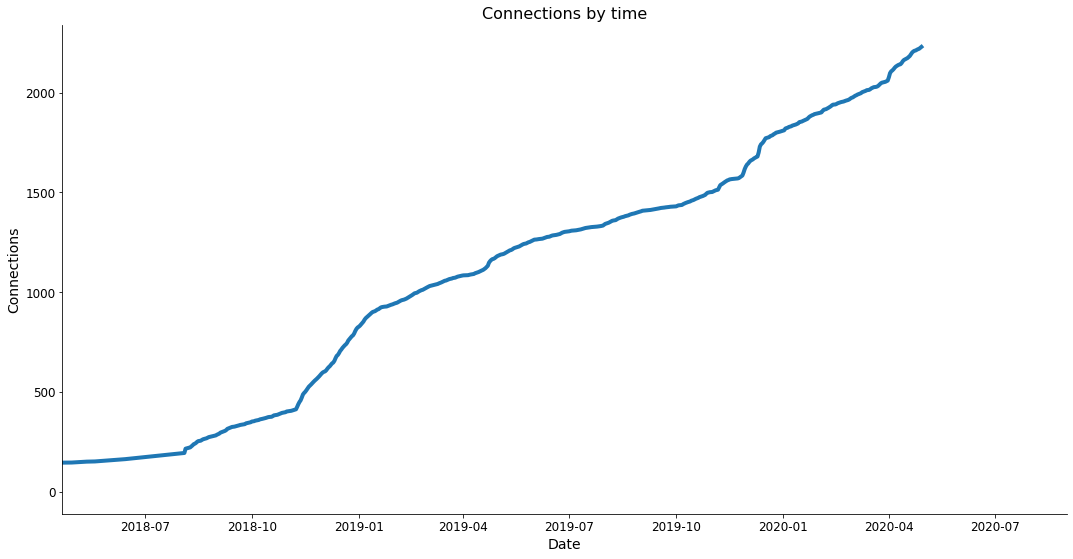

In [123]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f7ea1f","#f7801f"]
palette = sns.color_palette(flatui)
import datetime
plt.figure (figsize = (18,9))
ax = sns.lineplot (data = df_pos_time_line,x='Connected On',y=index,linewidth=4)

ax.set_xlim([datetime.date(2018, 4, 21), datetime.date(2020, 9, 1)])

plt.title ('Connections by time',fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel ('Connections',fontsize=14)
ax.set_xlabel('Date',fontsize=14)
ax.tick_params(labelsize=12)


# Connections by request types

In [52]:
df_invitations.head()

,From,To,Sent At,Message,Direction
0,Moein Nikpour,Alireza Shafiee,"4/27/20, 6:21 AM",NaN,OUTGOING
1,Moein Nikpour,Hamidreza Lachin,"4/22/20, 3:56 AM",NaN,OUTGOING
2,Moein Nikpour,hamid mohammadi,"4/19/20, 11:17 PM",NaN,OUTGOING
3,Moein Nikpour,mahdi khatmi nemati,"4/19/20, 11:16 PM",NaN,OUTGOING
4,Moein Nikpour,Forood Azargoshasbi,"4/19/20, 11:15 PM",NaN,OUTGOING


In [83]:
df_count = pd.DataFrame (df_invitations['Direction'].value_counts())
df_count.reset_index(inplace = True)
df_count['Direction'] = df_count['Direction']*2

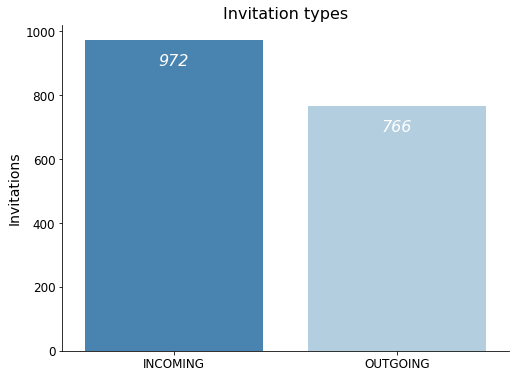

In [88]:
plt.figure (figsize = (8,6))
ax = sns.barplot (data = df_count,x='index',y='Direction',palette= reversed(sns.color_palette("Blues",n_colors=2)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title ('Invitation types',fontsize = 16)
ax.set_ylabel ('Invitations',fontsize=14)
ax.set_xlabel(None,fontsize=14)
ax.tick_params(labelsize=12)

for i,index in enumerate (df_count.index):
        label = df_count.loc [index,'Direction']
        ax.text(i,label-80, round(label, 2), color='white', ha="center",style = 'oblique',fontsize=16)
       
        
